/opt/conda/envs/py_3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/py_3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/conda/envs/py_3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.11.crossattention.c_attn.weigh

['The first time I saw the new version of the game, I was so excited. I was so excited to see how it would play out. I was so excited to see how it would play out.\n\nI was so excited to see how it would play out. I was so excited to see how it would play out.\n\nI was so excited to see how it would play out. I was so excited to see how it would play out.\n\nI was so excited to see how it would play out. I was so excited to see how it would play out.\n\nI was so excited to']


/opt/conda/envs/py_3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a cat laying on a couch next to a remote']


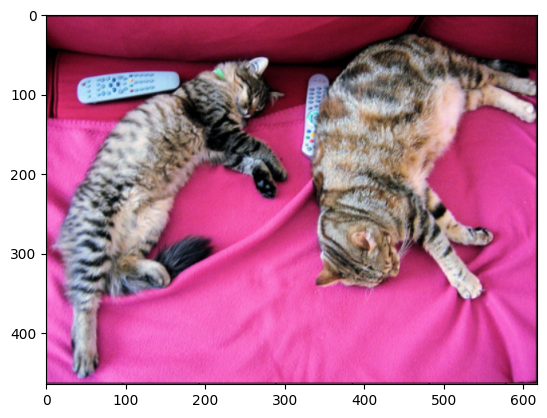

In [1]:
from transformers import ViTImageProcessor, GPT2Tokenizer
import requests
from PIL import Image
from matplotlib import pyplot as plt
import torch
import numpy as np

# load input image
image = Image.open('../images/tabby-cat.PNG').convert("RGB")
plt.figure()
plt.imshow(image)

#preprocess to 224*224 size and other ViT specs
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
pixel_values = torch.Tensor(processor(image, return_tensors="np").pixel_values).to('cuda')

#tokenizer of decoding text predictions
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

from transformers import GPT2Config, ViTConfig, VisionEncoderDecoderConfig, VisionEncoderDecoderModel, AutoTokenizer

model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained('google/vit-base-patch16-224-in21k','gpt2').to('cuda')
#GPT config doesn't have pad token, so define it the same as eos_token
model.config.pad_token_id = model.config.eos_token_id

output_ids = model.generate(pixel_values, max_length=128)
preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
preds = [pred.strip() for pred in preds]
print(preds)

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to('cuda')
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

pixel_values = torch.Tensor(processor(image, return_tensors="np").pixel_values).to('cuda')
output_ids = model.generate(pixel_values, max_length=128)
preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
preds = [pred.strip() for pred in preds]
print(preds)

In [2]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")

image = Image.open('../images/tabby-cat.PNG').convert("RGB")

inputs = processor(image, return_tensors="np")
pixel_values = torch.Tensor(inputs['pixel_values']).to("cuda")

out = model.generate(pixel_values)
print(processor.decode(out[0], skip_special_tokens=True))

two cats sleeping on a pink blanket


/opt/conda/envs/py_3.10/lib/python3.10/site-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
